# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Итак, прочитаем нашу таблицу:

In [2]:
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = churn_data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

In [4]:
# Ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке RowNumber = 0
Кол-во пропусков в колонке CustomerId = 0
Кол-во пропусков в колонке Surname = 0
Кол-во пропусков в колонке CreditScore = 0
Кол-во пропусков в колонке Geography = 0
Кол-во пропусков в колонке Gender = 0
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке Tenure = 0
Кол-во пропусков в колонке Balance = 0
Кол-во пропусков в колонке NumOfProducts = 0
Кол-во пропусков в колонке HasCrCard = 0
Кол-во пропусков в колонке IsActiveMember = 0
Кол-во пропусков в колонке EstimatedSalary = 0
Кол-во пропусков в колонке Exited = 0


In [6]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Какие это значения?
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
# какова статистика распределения этих значений? (сколько каких значений)
df['Geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [9]:
# исследование целевого (target) признака - факта ухода клиента 
print('кол-во уникальных значений в таргете: ', df['Exited'].nunique())
print('перечень уникальных значений в таргете: ', df['Exited'].unique())
print('статистика распределения значений в таргете: \n', df['Exited'].value_counts(normalize=True))

кол-во уникальных значений в таргете:  2
перечень уникальных значений в таргете:  [1 0]
статистика распределения значений в таргете: 
 0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [10]:
# описательная статистика для признака Age
df['Age'].describe()
df['Age'].nunique()

70

In [11]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

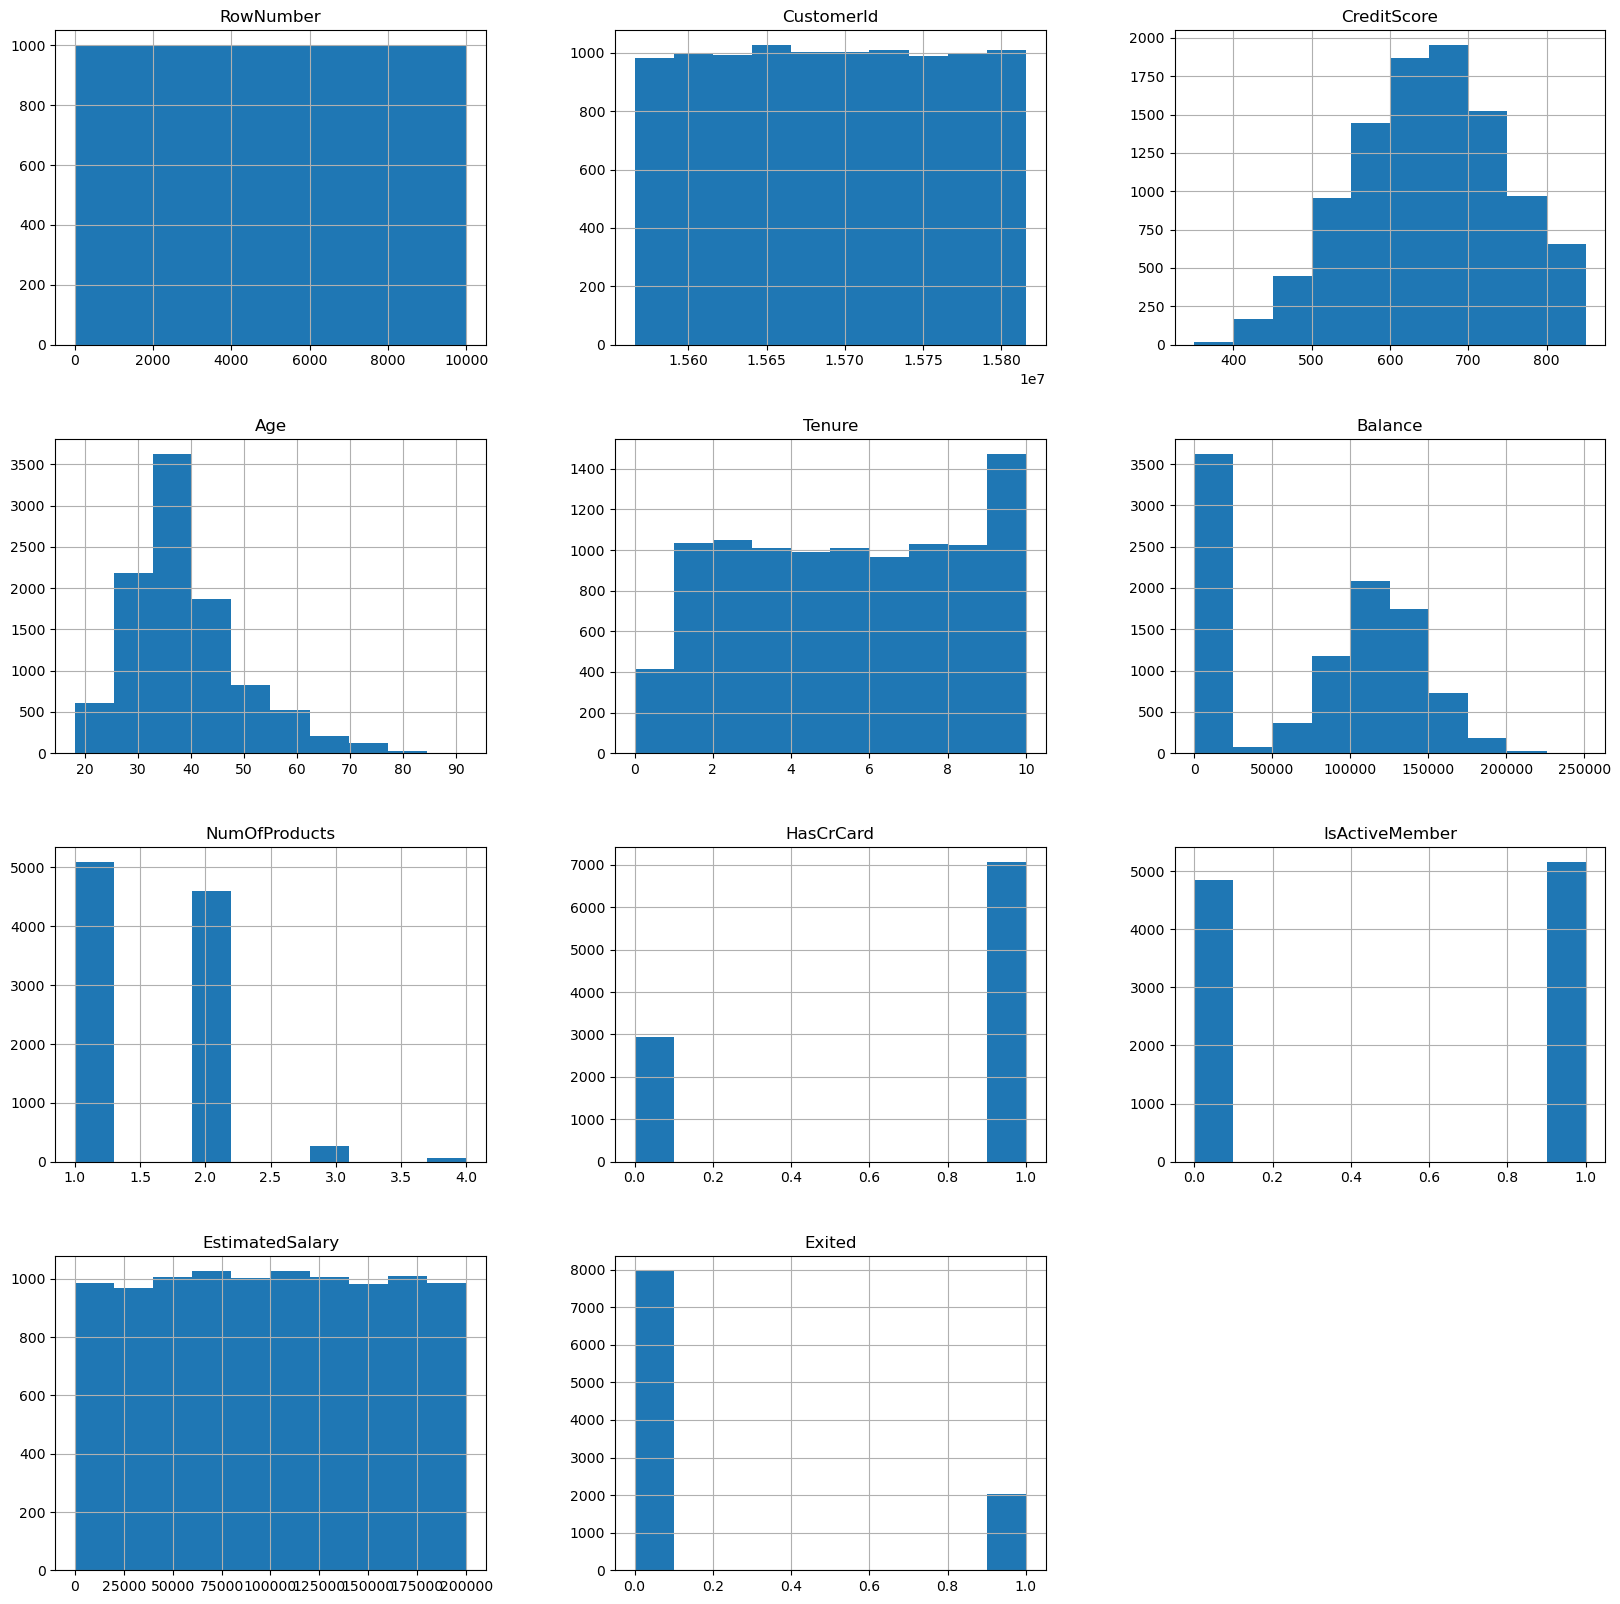

In [12]:
# Ваш код здесь
# гистаграммы всех признаков
df.hist(figsize=(20,20))

Среднее и медиана довольно близки. Похоже, что в распределениях нет значительных перекосов и выбросов.

In [16]:

# Выбираем только числовые столбцы для расчета корреляционной матрицы
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Теперь можно рассчитать корреляцию
corr = df_numeric.corr()
print(corr)



                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

<Axes: >

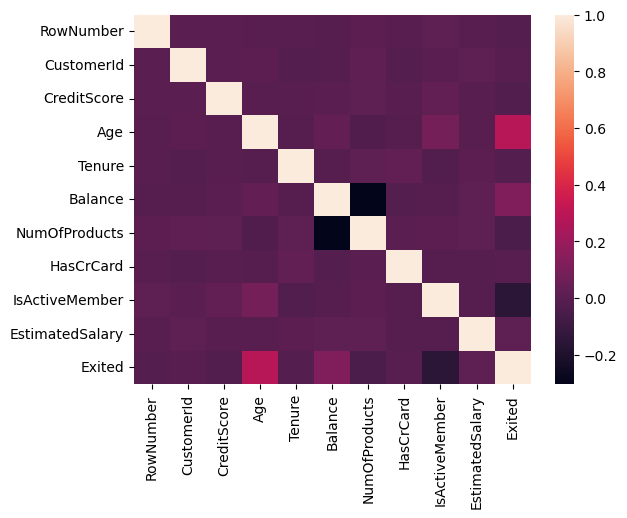

In [17]:
# тепловая карта корреляций между признаками
sns.heatmap(corr)

In [18]:
numeric_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

df[numeric_columns].describe()

,CreditScore,Balance,EstimatedSalary,Age
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,100090.239881,38.921800
std,96.653299,62397.405202,57510.492818,10.487806
min,350.000000,0.000000,11.580000,18.000000
25%,584.000000,0.000000,51002.110000,32.000000
50%,652.000000,97198.540000,100193.915000,37.000000
75%,718.000000,127644.240000,149388.247500,44.000000
max,850.000000,250898.090000,199992.480000,92.000000


In [ ]:
# замена значений для указанного признака
# Замена значений в колонке Gender
#df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


In [13]:
from sklearn.preprocessing import LabelEncoder

# Кодируем столбец 'Gender' (например, 'Male' и 'Female')
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Пример того, как отображаются закодированные значения
df.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df['Gender'].unique()

array([0, 1])

In [15]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"])
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [17]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [18]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [19]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [20]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']

В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [ ]:
#churn_data = churn_data[churn_data['Geography'] == 'Germany']
#churn_data.shape

(2509, 14)

In [21]:
df = df[df['Geography'] == 'Germany']
df.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [ ]:
#churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
#churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [22]:
df1 = df.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,0,29,4,115046.74,4,1,0,119346.88,1
15,616,1,45,3,143129.41,2,0,1,64327.26,0
16,653,1,58,1,132602.88,1,1,0,5097.67,1
26,756,1,36,2,136815.64,1,1,1,170041.95,0
28,574,0,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [ ]:
#churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
df1.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [30]:
#churn_data[churn_data.duplicated()].sum()

In [24]:
df1[df1.duplicated()].sum()

CreditScore        0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [25]:
# Ваш код здесь
import pandas as pd

# Создаем новые признаки
df1['BalanceSalaryRatio'] = df1['Balance'] / df1['EstimatedSalary']
df1['TenureByAge'] = df1['Tenure'] / df['Age']
df1['CreditScoreGivenAge'] = df1['CreditScore'] / df['Age']

# Перекодируем текстовые категориальные признаки в числовые бинарные столбцы
df1 = pd.get_dummies(df1, drop_first=True)

# Выводим основные статистические характеристики
print(df1.describe())
df1.head()

       CreditScore       Gender          Age       Tenure        Balance  \
count  2509.000000  2509.000000  2509.000000  2509.000000    2509.000000   
mean    651.453567     0.524512    39.771622     5.009964  119730.116134   
std      98.168937     0.499498    10.519143     2.935154   27022.006157   
min     350.000000     0.000000    18.000000     0.000000   27288.430000   
25%     584.000000     0.000000    32.000000     2.000000  102800.720000   
50%     651.000000     1.000000    38.000000     5.000000  119703.100000   
75%     722.000000     1.000000    45.000000     8.000000  137560.380000   
max     850.000000     1.000000    84.000000    10.000000  214346.960000   

       NumOfProducts   HasCrCard  IsActiveMember  EstimatedSalary  \
count    2509.000000  2509.00000     2509.000000      2509.000000   
mean        1.519729     0.71383        0.497409    101113.435102   
std         0.619420     0.45206        0.500093     58263.011501   
min         1.000000     0.00000       

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [26]:
X = df1.drop("Exited", axis=1)
y = df1["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [27]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [29]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


0    0.675704
1    0.324296
Name: Exited, dtype: float64



Test :


0    0.675159
1    0.324841
Name: Exited, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [30]:
# Ваш код здесь
#Выберем StandardScaler, так как он подходит для данных с нормальным распределением.
#Обучаем скейлер на тренировочной выборке.
#Применяем его к тренировочной и тестовой выборкам.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Предположим, что X - это матрица признаков, а y - целевая переменная
X = df1.drop(columns='Exited')  # Признаки
y = df1['Exited']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Создаем объект StandardScaler и обучаем его на тренировочной выборке
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 2. Применяем масштабирование к тестовой выборке
X_test_scaled = scaler.transform(X_test)

# Теперь тренировочные и тестовые выборки масштабированы и готовы к использованию
# Мы можеv обучить модель на X_train_scaled и протестировать на X_test_scaled


Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


> Укажите название метрики и обоснования своего выбора здесь

> В данной задаче лучше всего использовать F1 Score в качестве основной метрики для оптимизации, чтобы достичь баланса между ложноположительными и ложноотрицательными результатами. Это обеспечит эффективное использование ресурсов и позволит сохранить как можно больше клиентов, минимизируя при этом ненужные звонки.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> Ваши рассуждения и ответ — *здесь*.

> В контексте оттока клиентов, где отток может быть относительно малым (в большинстве случаев клиенты остаются), метрики точности (Precision) и полноты ( Recall) могут дать более четкую картину. Precision-Recall AUC позволяет сосредоточиться на том, как хорошо модель справляется с положительными примерами (клиенты, уходящие из банка).

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [31]:
# Ваш код здесь

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Создаем и обучаем модель логистической регрессии
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Делаем предсказание (прогноз) для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)

# Вывод отчета о метриках классификации для тренировочной выборки
print("Отчет о метриках для тренировочной выборки:")
print(metrics.classification_report(y_train, y_train_pred))

# Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)

# Получаем отчет о метриках для тестовой выборки
report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

# Вывод отчета о метриках классификации для тестовой выборки
print("Отчет о метриках для тестовой выборки:")
print(metrics.classification_report(y_test, y_test_pred))

# Извлекаем значения Precision, Recall и F1 Score для положительного класса
precision = report['1']['precision']  # Предполагается, что 1 - это положительный класс
recall = report['1']['recall']        # Предполагается, что 1 - это положительный класс
f1_score = report['1']['f1-score']    # Предполагается, что 1 - это положительный класс

# Проверяем значения Recall, Precision и F1 Score
if f1_score < 0.5:
    print("Модель недообучена по F1 Score, так как значение на тестовой выборке меньше 0.5.")
else:
    print("Модель обучена достаточно хорошо по F1 Score, значение на тестовой выборке:", f1_score)

if precision < 0.5:
    print("Модель имеет низкое значение Precision на тестовой выборке:", precision)
else:
    print("Модель имеет приемлемое значение Precision на тестовой выборке:", precision)

if recall < 0.5:
    print("Модель имеет низкое значение Recall на тестовой выборке:", recall)
else:
    print("Модель имеет приемлемое значение Recall на тестовой выборке:", recall)


Отчет о метриках для тренировочной выборки:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1207
           1       0.63      0.38      0.47       549

    accuracy                           0.74      1756
   macro avg       0.70      0.64      0.65      1756
weighted avg       0.72      0.74      0.71      1756

Отчет о метриках для тестовой выборки:
              precision    recall  f1-score   support

           0       0.74      0.90      0.82       488
           1       0.71      0.43      0.54       265

    accuracy                           0.74       753
   macro avg       0.73      0.67      0.68       753
weighted avg       0.73      0.74      0.72       753

Модель обучена достаточно хорошо по F1 Score, значение на тестовой выборке: 0.5352112676056338
Модель имеет приемлемое значение Precision на тестовой выборке: 0.7080745341614907
Модель имеет низкое значение Recall на тестовой выборке: 0.43018867924528303


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Список значений для penalties и C
penalties = ['l1', 'l2']
C_values = [0.1, 1]

# Создаем пустой список для хранения результатов
results = []

# Перебираем все комбинации параметров
for penalty in penalties:
    for C in C_values:
        # Создаем объект класса логистической регрессии с текущими параметрами
        log_reg = LogisticRegression(
            penalty=penalty,  # тип регуляризации
            C=C,              # обратный коэффициент регуляризации
            solver='saga',    # алгоритм оптимизации
            random_state=1,   # генератор случайных чисел
            max_iter=1000     # количество итераций на сходимость
        )
        
        # Обучаем модель
        log_reg.fit(X_train_scaled, y_train)
        
        # Предсказание меток классов
        y_train_pred = log_reg.predict(X_train_scaled)
        y_test_pred = log_reg.predict(X_test_scaled)

        # Получаем отчет о метриках для тестовой выборки
        report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

        # Извлекаем значения Precision, Recall и F1 Score для положительного класса
        precision = report['1']['precision']  # Предполагается, что 1 - это положительный класс
        recall = report['1']['recall']        # Предполагается, что 1 - это положительный класс
        f1_score = report['1']['f1-score']    # Предполагается, что 1 - это положительный класс

        # Добавляем результаты в список
        results.append({
            'penalty': penalty,
            'C': C,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score
        })

        # Проверяем значение F1 Score
        if f1_score < 0.5:
            print(f"Модель с penalty={penalty} и C={C} недообучена по F1 Score.")
        else:
            print(f"Модель с penalty={penalty} и C={C} обучена достаточно хорошо по F1 Score.")

        # Проверяем значение Precision
        if precision < 0.5:
            print(f"Модель с penalty={penalty} и C={C} имеет низкое значение Precision.")
        else:
            print(f"Модель с penalty={penalty} и C={C} имеет приемлемое значение Precision.")

        # Проверяем значение Recall
        if recall < 0.5:
            print(f"Модель с penalty={penalty} и C={C} имеет низкое значение Recall.")
        else:
            print(f"Модель с penalty={penalty} и C={C} имеет приемлемое значение Recall.")

# Вывод результатов
for result in results:
    print(result)


Модель с penalty=l1 и C=0.1 недообучена по F1 Score.
Модель с penalty=l1 и C=0.1 имеет приемлемое значение Precision.
Модель с penalty=l1 и C=0.1 имеет низкое значение Recall.
Модель с penalty=l1 и C=1 обучена достаточно хорошо по F1 Score.
Модель с penalty=l1 и C=1 имеет приемлемое значение Precision.
Модель с penalty=l1 и C=1 имеет низкое значение Recall.
Модель с penalty=l2 и C=0.1 обучена достаточно хорошо по F1 Score.
Модель с penalty=l2 и C=0.1 имеет приемлемое значение Precision.
Модель с penalty=l2 и C=0.1 имеет низкое значение Recall.
Модель с penalty=l2 и C=1 обучена достаточно хорошо по F1 Score.
Модель с penalty=l2 и C=1 имеет приемлемое значение Precision.
Модель с penalty=l2 и C=1 имеет низкое значение Recall.
{'penalty': 'l1', 'C': 0.1, 'precision': 0.7083333333333334, 'recall': 0.3849056603773585, 'f1_score': 0.4987775061124695}
{'penalty': 'l1', 'C': 1, 'precision': 0.70625, 'recall': 0.42641509433962266, 'f1_score': 0.531764705882353}
{'penalty': 'l2', 'C': 0.1, 'prec

> Ваши выводы и рассуждения — *здесь*.

> Модели с C=1 обучены лучше, чем с C=0.1, что указывает на необходимость более высокой регуляризации для достижения лучших результатов.
> Для всех моделей наблюдается низкое значение recall, что означает, что ни одна из моделей не справляется с задачей обнаружения клиентов, склонных к оттоку.
> Несмотря на приемлемую точность (precision), это не достаточно, т.к. модель не может находить положительные случаи, что подчеркивает важность recall в контексте задачи.

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [33]:
# Ваш код здесь
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# наши данные, X - это матрица признаков, а y - целевая переменная
#X = df1.drop(columns='Exited')  # Признаки
#y = df1['Exited']  # Целевая переменная

# Разделение данных на тренировочную и тестовую выборки
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Генерация полиномиальных признаков третьей степени
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Обучение модели логистической регрессии
log_reg_poly = LogisticRegression(random_state=42)
log_reg_poly.fit(X_train_poly, y_train)

# Предсказание меток классов
y_train_pred_poly = log_reg_poly.predict(X_train_poly)
y_test_pred_poly = log_reg_poly.predict(X_test_poly)

# Печатаем матрицу ошибок и отчет по классификации
print("\nМатрица ошибок (Confusion Matrix):")
print(confusion_matrix(y_test, y_test_pred_poly))
print("\nОтчет по классификации (Classification Report):")
print(classification_report(y_test, y_test_pred_poly))

# Расчет метрик
f1 = f1_score(y_test, y_test_pred_poly)
precision = precision_score(y_test, y_test_pred_poly)
recall = recall_score(y_test, y_test_pred_poly)

# Печатаем метрики
print(f"\nF1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Пример для сравнения с предыдущими результатами 
previous_f1 = 0.54  # пример предыдущего значения F1 Score
previous_precision = 0.70  # пример предыдущего значения Precision
previous_recall = 0.43  # пример предыдущего значения Recall

print(f"\nСравнение метрик:")
print(f"F1 Score предыдущей модели: {previous_f1:.2f}, текущей модели: {f1:.2f}")
print(f"Precision предыдущей модели: {previous_precision:.2f}, текущей модели: {precision:.2f}")
print(f"Recall предыдущей модели: {previous_recall:.2f}, текущей модели: {recall:.2f}")

if f1 > previous_f1:
    print("Улучшение F1 Score!")
if precision > previous_precision:
    print("Улучшение Precision!")
if recall > previous_recall:
    print("Улучшение Recall!")



Матрица ошибок (Confusion Matrix):
[[416  72]
 [ 86 179]]

Отчет по классификации (Classification Report):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       488
           1       0.71      0.68      0.69       265

    accuracy                           0.79       753
   macro avg       0.77      0.76      0.77       753
weighted avg       0.79      0.79      0.79       753


F1 Score: 0.69
Precision: 0.71
Recall: 0.68

Сравнение метрик:
F1 Score предыдущей модели: 0.54, текущей модели: 0.69
Precision предыдущей модели: 0.70, текущей модели: 0.71
Recall предыдущей модели: 0.43, текущей модели: 0.68
Улучшение F1 Score!
Улучшение Precision!
Улучшение Recall!


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# наши данные, X - это матрица признаков, а y - целевая переменная
X = df1.drop(columns='Exited')  # Признаки
y = df1['Exited']  # Целевая переменная


# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Генерация полиномиальных признаков третьей степени
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Параметры для экспериментов
penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10, 100]  # Пример различных значений C

# Хранение результатов
results = []

for penalty in penalties:
    for C in C_values:
        
        # Обучение модели логистической регрессии
        log_reg_poly = LogisticRegression(penalty=penalty, C=C, random_state=42, solver='liblinear' if penalty == 'l1' else 'lbfgs')
        log_reg_poly.fit(X_train_poly, y_train)

        # Предсказание меток классов
        y_test_pred_poly = log_reg_poly.predict(X_test_poly)

        # Расчет метрик
        f1 = f1_score(y_test, y_test_pred_poly)
        precision = precision_score(y_test, y_test_pred_poly)
        recall = recall_score(y_test, y_test_pred_poly)

        # Сохранение результатов
        results.append((penalty, C, f1, precision, recall))

# Вывод результатов
results_df = pd.DataFrame(results, columns=['Penalty', 'C', 'F1 Score', 'Precision', 'Recall'])
print(results_df)

# Опционально: можно сохранить результаты в CSV файл
# results_df.to_csv('logistic_regression_results.csv', index=False)


  Penalty       C  F1 Score  Precision    Recall
0      l1    0.01  0.717608   0.907563  0.593407
1      l1    0.10  0.786325   0.816568  0.758242
2      l1    1.00  0.759207   0.783626  0.736264
3      l1   10.00  0.764873   0.789474  0.741758
4      l1  100.00  0.761905   0.777143  0.747253
5      l2    0.01  0.745562   0.807692  0.692308
6      l2    0.10  0.771831   0.791908  0.752747
7      l2    1.00  0.744986   0.778443  0.714286
8      l2   10.00  0.729885   0.765060  0.697802
9      l2  100.00  0.729885   0.765060  0.697802


> Если приоритет отдать Recall, то наиболее подходящим вариантом будет l1 ( l1 регуляризация (Lasso) ) регуляризация с C=1. В таком случае, модель будет склонна к более высоким значениям Recall (0.758) при сохранении приемлемого уровня Precision (0.817). Это поможет нам уменьшить риск пропустить клиентов, склонных к уходу.

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

# Предположим, что ваши данные уже загружены в df1
# X - это матрица признаков, а y - целевая переменная
X = df1.drop(columns='Exited')  # Признаки
y = df1['Exited']  # Целевая переменная

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Генерация полиномиальных признаков третьей степени
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Параметры для экспериментов
penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10, 100]  # Пример различных значений C

# Хранение результатов
results = []

for penalty in penalties:
    for C in C_values:
        
        # Обучение модели логистической регрессии с class_weight='balanced'
        log_reg_poly = LogisticRegression(
            penalty=penalty, 
            C=C, 
            random_state=42, 
            solver='liblinear' if penalty == 'l1' else 'lbfgs', 
            class_weight='balanced'
        )
        
        log_reg_poly.fit(X_train_poly, y_train)

        # Предсказание меток классов
        y_test_pred_poly = log_reg_poly.predict(X_test_poly)

        # Расчет метрик
        f1 = f1_score(y_test, y_test_pred_poly)
        precision = precision_score(y_test, y_test_pred_poly)
        recall = recall_score(y_test, y_test_pred_poly)

        # Сохранение результатов
        results.append((penalty, C, f1, precision, recall))

# Вывод результатов
results_df = pd.DataFrame(results, columns=['Penalty', 'C', 'F1 Score', 'Precision', 'Recall'])
print(results_df)


  Penalty       C  F1 Score  Precision    Recall
0      l1    0.01  0.722772   0.657658  0.802198
1      l1    0.10  0.741463   0.666667  0.835165
2      l1    1.00  0.741463   0.666667  0.835165
3      l1   10.00  0.740000   0.678899  0.813187
4      l1  100.00  0.703242   0.643836  0.774725
5      l2    0.01  0.745679   0.677130  0.829670
6      l2    0.10  0.744417   0.678733  0.824176
7      l2    1.00  0.723716   0.651982  0.813187
8      l2   10.00  0.715328   0.641921  0.807692
9      l2  100.00  0.720988   0.654709  0.802198


> Ваши выводы и рассуждения — *здесь*

> После добавления class_weight='balanced', мы видим значительное улучшение в Recall для всех комбинаций значений C и регуляризаций l1 и l2, что указывает на то, что модель стала более чувствительной к положительному классу (клиенты, склонные к уходу)

> Так как нашей приоритетной метрикой остается Recall, тогда l1 регуляризация с C=0.1 или C=1.0 может стать оптимальным выбором для модели, способной хорошо улавливать склонных к уходу клиентов при приемлемом уровне Precision.

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

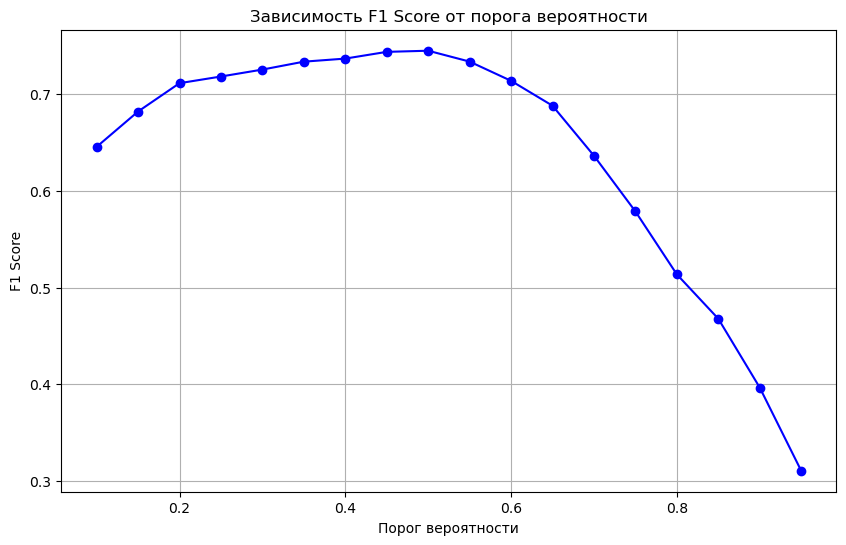

Оптимальный порог вероятности: 0.5000000000000001, максимальный F1 Score: 0.7449856733524356

Метрики с оптимальным порогом вероятности:
Accuracy: 0.8227091633466136
Precision: 0.7784431137724551
Recall: 0.7142857142857143
F1 Score: 0.7449856733524356

F1 Score с порогом 0.5: 0.7449856733524356


In [37]:
# Ваш код здесь
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Обучение модели логистической регрессии
model = LogisticRegression(random_state=42)
model.fit(X_train_poly, y_train)

# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])

# Инициализируем список, куда будем сохранять метрики
scores = []

# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)

# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание классов по текущему порогу
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    
    # Рассчитываем метрику F1
    score = f1_score(y_test, y_test_pred_poly)
    
    # Добавляем результат в список
    scores.append(score)

# Преобразуем список метрик в DataFrame для удобства
scores_df = pd.DataFrame({'Threshold': thresholds, 'F1 Score': scores})

# Построим график зависимости F1 Score от порога вероятности
plt.figure(figsize=(10, 6))
plt.plot(scores_df['Threshold'], scores_df['F1 Score'], marker='o', linestyle='-', color='b')
plt.title('Зависимость F1 Score от порога вероятности')
plt.xlabel('Порог вероятности')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

# Определим порог вероятности с максимальной метрикой F1 Score
optimal_threshold = scores_df.loc[scores_df['F1 Score'].idxmax(), 'Threshold']
optimal_f1 = scores_df['F1 Score'].max()

print(f'Оптимальный порог вероятности: {optimal_threshold}, максимальный F1 Score: {optimal_f1}')

# Делаем финальное предсказание классов с оптимальным порогом
y_test_pred_optimal = y_test_proba_pred.apply(lambda x: 1 if x > optimal_threshold else 0)

# Рассчитываем метрики для предсказания с оптимальным порогом
accuracy_optimal = accuracy_score(y_test, y_test_pred_optimal)
precision_optimal = precision_score(y_test, y_test_pred_optimal)
recall_optimal = recall_score(y_test, y_test_pred_optimal)
f1_optimal = f1_score(y_test, y_test_pred_optimal)

print("\nМетрики с оптимальным порогом вероятности:")
print(f"Accuracy: {accuracy_optimal}")
print(f"Precision: {precision_optimal}")
print(f"Recall: {recall_optimal}")
print(f"F1 Score: {f1_optimal}")

# Сравнение с результатами при пороге 0.5
y_test_pred_default = y_test_proba_pred.apply(lambda x: 1 if x > 0.5 else 0)
f1_default = f1_score(y_test, y_test_pred_default)

print(f"\nF1 Score с порогом 0.5: {f1_default}")


> С текущим порогом 0.5 модель хорошо справляется с балансом между Precision и Recall. Если необходимо повысить Recall для повышения выявления уходящих клиентов, возможно, стоит снизить порог (например, до 0.45) и провести аналогичный анализ метрик.
> Анализ F1 Score на разных порогах вероятности также показал, что порог 0.5 — оптимальный, и его стоит использовать на тестовой выборке, если обе метрики важны.
Этот результат подтверждается графиком F1 Score от порога вероятности, где 0.5 — точка максимума.

#### Посмотрим и сравним , как меняются метрики при изменении порога, и определим для себя оптимальное значение для нашей задачи.

In [38]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Установим порог вероятности на уровне 0.45
threshold = 0.45

# Предсказания с использованием нового порога
y_test_pred_custom = (log_reg_poly.predict_proba(X_test_poly)[:, 1] >= threshold).astype(int)

# Расчет метрик для порога 0.45
accuracy_custom = accuracy_score(y_test, y_test_pred_custom)
precision_custom = precision_score(y_test, y_test_pred_custom)
recall_custom = recall_score(y_test, y_test_pred_custom)
f1_score_custom = f1_score(y_test, y_test_pred_custom)

# Вывод метрик для порога 0.45
print("Метрики с порогом вероятности 0.45:")
print(f"Accuracy: {accuracy_custom:.4f}")
print(f"Precision: {precision_custom:.4f}")
print(f"Recall: {recall_custom:.4f}")
print(f"F1 Score: {f1_score_custom:.4f}")


Метрики с порогом вероятности 0.45:
Accuracy: 0.7510
Precision: 0.6203
Recall: 0.8077
F1 Score: 0.7017


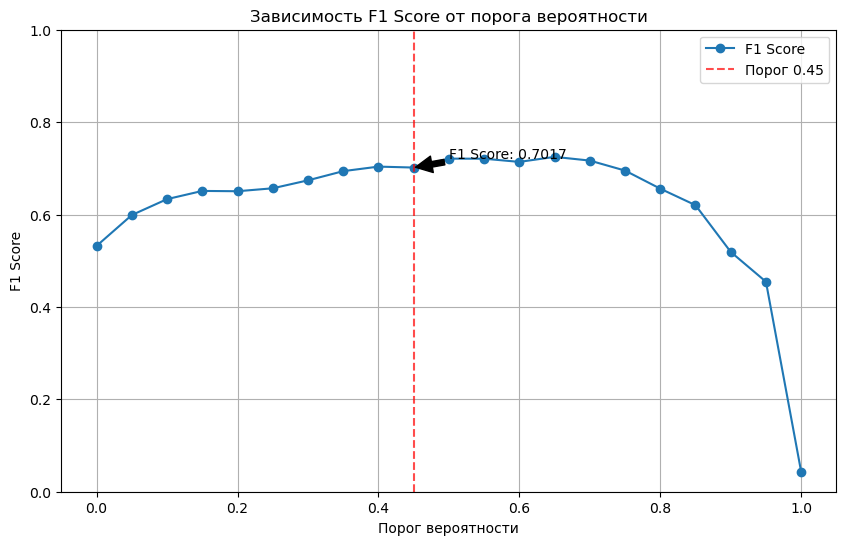

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Создадим список порогов вероятности
thresholds = np.arange(0.0, 1.05, 0.05)
f1_scores = []

# Рассчитаем F1 Score для каждого порога
for threshold in thresholds:
    y_test_pred = (log_reg_poly.predict_proba(X_test_poly)[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_test_pred))

# Построим график зависимости F1 Score от порога вероятности
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', label='F1 Score')
plt.axvline(x=0.45, color='r', linestyle='--', label='Порог 0.45', alpha=0.7)

# Добавим аннотацию для порога 0.45
plt.annotate(f'F1 Score: {f1_score_custom:.4f}', xy=(0.45, f1_scores[int(0.45/0.05)]), 
             xytext=(0.5, f1_score_custom + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Зависимость F1 Score от порога вероятности')
plt.xlabel('Порог вероятности')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.ylim(0, 1)
plt.show()


> Наши результаты при пороге 0.45 показывают, что:

> Accuracy (Точность): 75.10% — модель правильно классифицирует 75.1% клиентов.
> Precision (Точность): 62.03% — из клиентов, которых модель классифицирует как уходящих, 62% действительно уходят.
> Recall (Полнота): 80.77% — модель правильно идентифицирует 80.77% уходящих клиентов.
> F1 Score: 70.17% — это сбалансированная метрика, показывающая, что между Precision и Recall существует компромисс.

> Этот график помог нам увидеть, как выбор порога влияет на метрики и убедиться, что порог 0.45 действительно эффективен для нашей задачи

## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Импортируем необходимые для выполнения практики модули:

In [44]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Train F1 Score: 1.00
Test F1 Score: 0.53


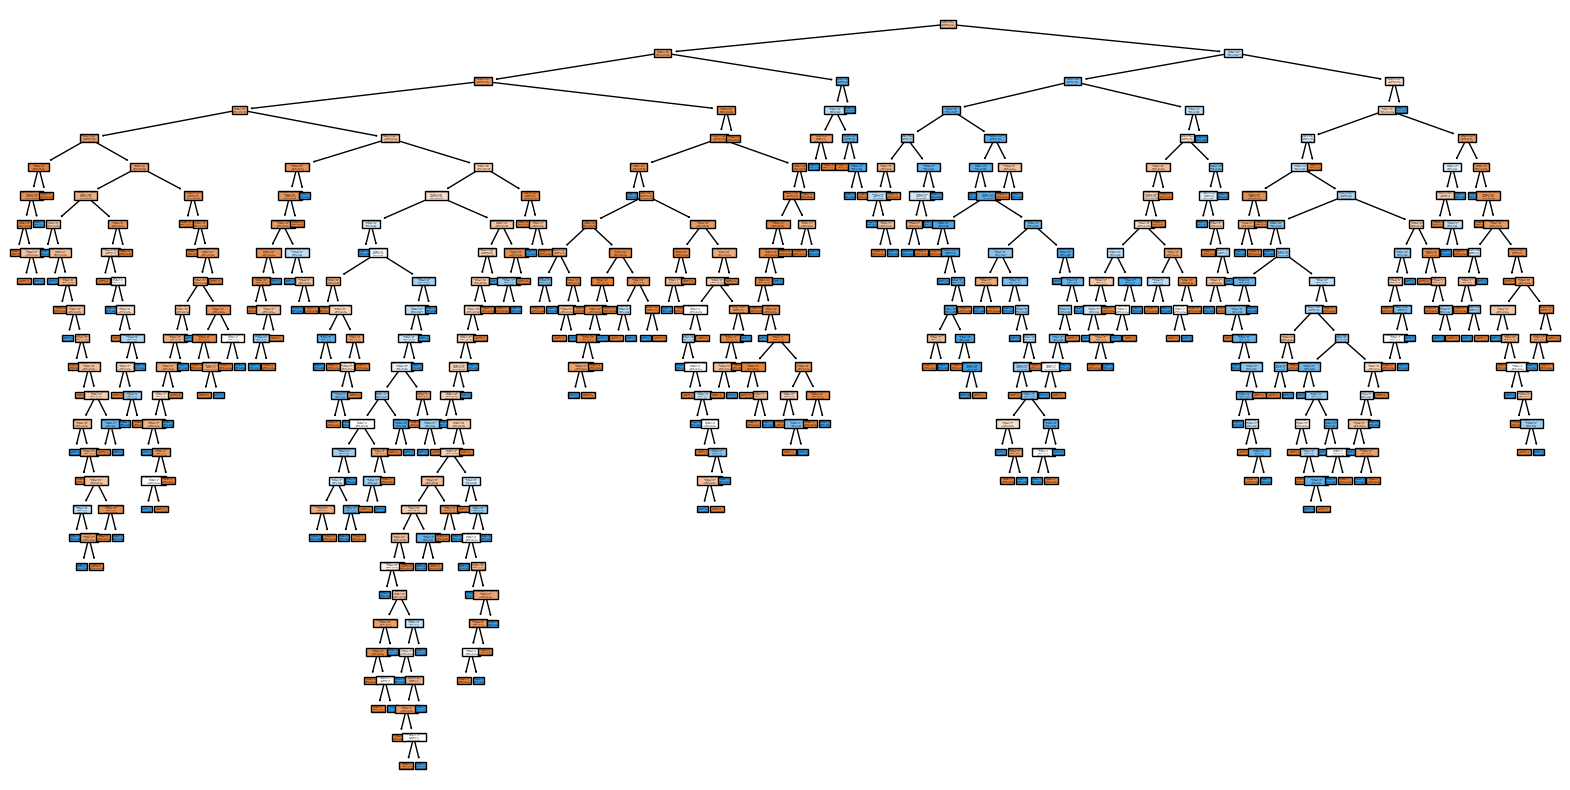

In [45]:
# Ваш код здесь
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

# Подготовка данных
X = df1.drop(columns='Exited')  # Признаки
y = df1['Exited']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки со стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Создаем объект класса дерево решений без ограничения глубины
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

# Обучаем дерево по алгоритму CART
dt.fit(X_train, y_train)

# Выводим значения метрики F1 для тренировочной выборки
y_train_pred = dt.predict(X_train)
print('Train F1 Score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

# Выводим значения метрики F1 для тестовой выборки
y_test_pred = dt.predict(X_test)
print('Test F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

# Визуализация графа дерева решений
plt.figure(figsize=(20,10))  # Создаем фигуру для визуализации
tree.plot_tree(dt, feature_names=X.columns, class_names=['Not Exited', 'Exited'], filled=True)
plt.show()


> Ваши выводы и рассуждения — *здесь*

> Результаты модели дерева решений с F1 Score на тренировочном наборе данных 1.00 и на тестовом наборе 0.53 указывают на явное переобучение.

> Высокая метрика на тренировочных данных (1.00): Модель практически идеально подстроилась под тренировочные данные. Это указывает на то, что дерево решений слишком "глубоко" изучило эти данные и запомнило все их особенности, включая шум.

> Низкая метрика на тестовых данных (0.53): На тестовой выборке модель работает значительно хуже. Это свидетельствует о том, что модель плохо обобщает информацию и не справляется с новыми данными, которые не входили в тренировочную выборку.

> Дерево решений без ограничения глубины стремится подстроиться под каждый возможный случай в тренировочных данных, включая выбросы и шум, что приводит к переобучению. 

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

Train F1 Score: 0.74
Test F1 Score: 0.60


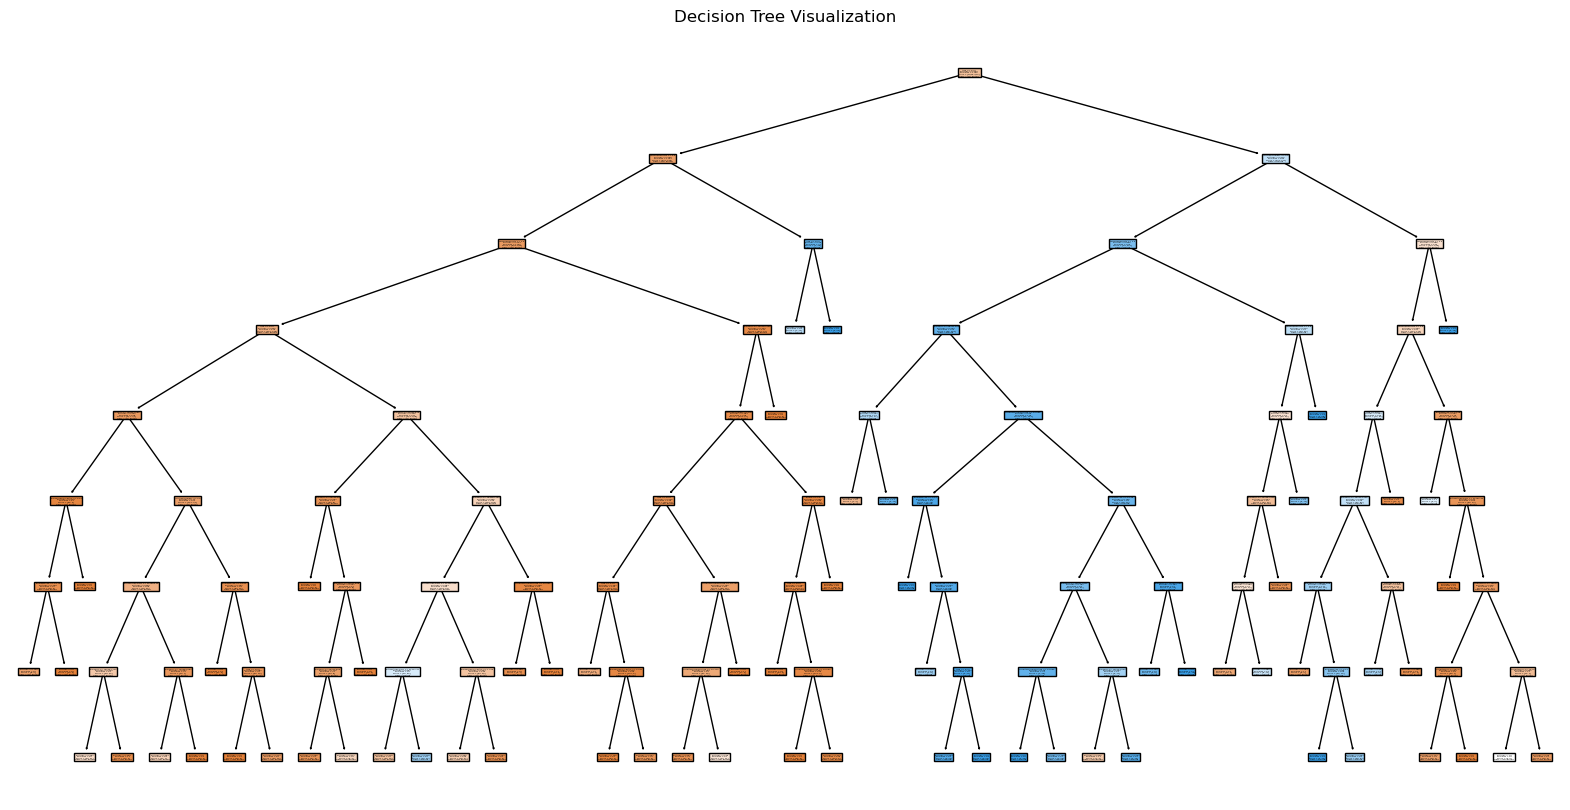

In [46]:
# Ваш код здесь
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

# Подготовка данных
X = df1.drop(columns='Exited')  # Признаки
y = df1['Exited']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки со стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Шаг 2: Создаем и обучаем «подстриженное» дерево решений
dt_model_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10, random_state=42)
dt_model_pruned.fit(X_train, y_train)

# Шаг 3: Предсказываем метки классов для тренировочной и тестовой выборок
y_train_pred_pruned = dt_model_pruned.predict(X_train)
y_test_pred_pruned = dt_model_pruned.predict(X_test)

# Выводим значения метрики F1 для тренировочной выборки
print('Train F1 Score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred_pruned)))
# Выводим значения метрики F1 для тестовой выборки
print('Test F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_pruned)))

# Визуализация дерева решений
plt.figure(figsize=(20,10))  # Задаем размер фигуры
plot_tree(dt_model_pruned, feature_names=X.columns, class_names=['Not Exited', 'Exited'], filled=True)
plt.title("Decision Tree Visualization")  # Заголовок графика
plt.show()  # Показываем график


> Ваши выводы и рассуждения — *здесь*  

> Новые результаты после применения подстриженного дерева решений;
> Train: 0.74 (уменьшение переобучения) Test: 0.60 (улучшение на тестовых данных); 

> Выводы: Улучшение обобщающей способности: Параметры max_depth=8 и min_samples_leaf=10 помогли уменьшить степень переобучения и повысить обобщающую способность модели.

> Можно рассмотреть  возможность использования ансамблевых методов, таких как Random Forest или Gradient Boosting, чтобы улучшить производительность модели. Эти методы могут помочь достичь лучшего баланса между точностью и обобщающей способностью. 

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [47]:
# Ваш код здесь
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score  

# Шаг 1: Предположим, что df1 уже подготовлен как в предыдущих шагах
X = df1.drop(columns='Exited')  # Признаки
y = df1['Exited']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки со стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Шаг 2: Создаем и обучаем случайный лес
rf_model = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_leaf=10, 
                                   criterion='entropy', random_state=42)
rf_model.fit(X_train, y_train)

# Шаг 3: Предсказываем метки классов для тренировочной и тестовой выборок
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Рассчитываем метрики F1 для тренировочной и тестовой выборок
train_f1_rf = f1_score(y_train, y_train_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Выводим значения метрики F1 для тренировочной выборки
print('Train F1 Score: {:.2f}'.format(train_f1_rf))
# Выводим значения метрики F1 для тестовой выборки
print('Test F1 Score: {:.2f}'.format(test_f1_rf))


Train F1 Score: 0.74
Test F1 Score: 0.62


> Ваши выводы и рассуждения — *здесь*

> Random Forest показывает неплохие результаты, поскольку использует ансамблевый подход то есть комбинирует несколько деревьев решений  и может уменьшать риск переобучения.
> Если настроить параметры модели и провести дополнительные эксперименты, можно добиться еще лучших результатов в предсказании оттока клиентов. 

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

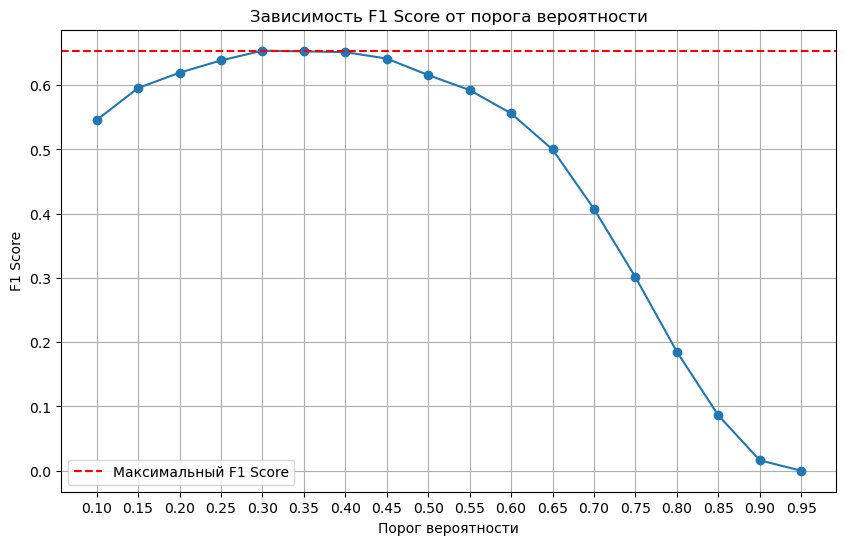

Оптимальный порог вероятности: 0.30
F1 Score с оптимальным порогом: 0.6536
Precision с оптимальным порогом: 0.5768
Recall с оптимальным порогом: 0.7541


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

# Шаг 1: Подготовка данных
X = df1.drop(columns='Exited')  # Признаки
y = df1['Exited']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки со стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Шаг 2: Создаем и обучаем модель случайного леса
rf_model = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_leaf=10, 
                                   criterion='entropy', random_state=42)
rf_model.fit(X_train, y_train)

# Шаг 3: Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = rf_model.predict_proba(X_test)[:, 1]

# Создаем списки для хранения значений метрик
recall_scores = []
precision_scores = []
f1_scores = []

# Сгенерируем набор порогов вероятности в диапазоне от 0.1 до 1 с шагом 0.05
thresholds = np.arange(0.1, 1, 0.05)

# Шаг 4: В цикле перебираем сгенерированные пороги и считаем метрики
for threshold in thresholds:
    # Предсказания классов по текущему порогу вероятности
    y_test_pred = (y_test_proba_pred > threshold).astype(int)
    
    # Рассчитываем метрики и добавляем их в списки
    recall_scores.append(recall_score(y_test, y_test_pred))
    precision_scores.append(precision_score(y_test, y_test_pred))
    f1_scores.append(f1_score(y_test, y_test_pred))
    
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.title('Зависимость F1 Score от порога вероятности')
plt.xlabel('Порог вероятности')
plt.ylabel('F1 Score')
plt.grid()
plt.xticks(thresholds)
plt.axhline(y=max(f1_scores), color='r', linestyle='--', label='Максимальный F1 Score')
plt.legend()
plt.show()




# Шаг 6: Определение оптимального порога (максимальный F1 Score)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Оптимальный порог вероятности: {optimal_threshold:.2f}")

# Шаг 7: Делаем предсказание классов с подобранным оптимальным порогом вероятности
y_test_pred_optimal = (y_test_proba_pred > optimal_threshold).astype(int)

# Рассчитываем метрики для оптимального порога
optimal_f1_score = f1_score(y_test, y_test_pred_optimal)
optimal_precision = precision_score(y_test, y_test_pred_optimal)
optimal_recall = recall_score(y_test, y_test_pred_optimal)

# Выводим финальные результаты
print(f"F1 Score с оптимальным порогом: {optimal_f1_score:.4f}")
print(f"Precision с оптимальным порогом: {optimal_precision:.4f}")
print(f"Recall с оптимальным порогом: {optimal_recall:.4f}")


Если важнее не пропускать клиентов, которые уйдут (важнее Recall), то первый вариант с порогом 0.30 будет лучше, так как он увеличивает Recall (0.7541), хотя точность будет снижаться.

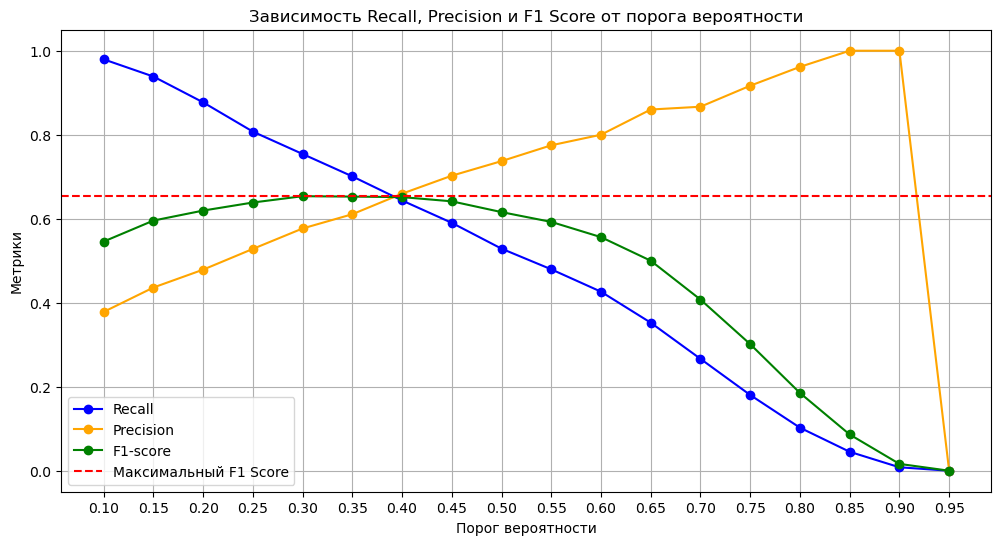

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Подготовка данных
X = df1.drop(columns='Exited')  # Признаки
y = df1['Exited']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки со стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Создаем и обучаем случайный лес
rf_model = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_leaf=10, 
                                   criterion='entropy', random_state=42)
rf_model.fit(X_train, y_train)

# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = rf_model.predict_proba(X_test)[:, 1]

# Создаем списки для хранения значений метрик
recall_scores = []
precision_scores = []
f1_scores = []

# Генерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

# Перебираем значения порогов вероятности
for threshold in thresholds:
    # Предсказание классов
    y_test_pred = (y_test_proba_pred > threshold).astype(int)
    
    # Рассчитываем метрики
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

# Визуализируем метрики при различных threshold
plt.figure(figsize=(12, 6))  # Размер графика

# Строим линейные графики
plt.plot(thresholds, recall_scores, marker='o', label='Recall', color='blue')
plt.plot(thresholds, precision_scores, marker='o', label='Precision', color='orange')
plt.plot(thresholds, f1_scores, marker='o', label='F1-score', color='green')

# Даем графику название и подписи осям
plt.title('Зависимость Recall, Precision и F1 Score от порога вероятности')
plt.xlabel('Порог вероятности')
plt.ylabel('Метрики')
plt.xticks(thresholds)
plt.grid()
plt.axhline(y=max(f1_scores), color='red', linestyle='--', label='Максимальный F1 Score')
plt.legend()
plt.show()


In [55]:
# Правильное предсказание с использованием векторных операций
threshold_opt = 0.4
y_test_pred_opt = (y_test_proba_pred > threshold_opt).astype(int)

# Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       509
           1       0.66      0.64      0.65       244

    accuracy                           0.78       753
   macro avg       0.75      0.74      0.74       753
weighted avg       0.78      0.78      0.78       753



- Если важнее сбалансированное качество с хорошими показателями Precision и Recall, то  вариант (с порогом 0.4) является более сбалансированным решением, так как F1 Score и Precision более стабильны и в среднем модель работает лучше.

> Ваши выводы и рассуждения — *здесь*

> Цель нашей задачи — не пропустить клиентов, которые могут уйти, и при этом важнее повысить полноту (Recall), то использование порога 0.30 будет предпочтительным. Хотя это приведет к снижению точности, Recall увеличится до 0.7541, что позволит более эффективно идентифицировать клиентов с высоким риском оттока.

> Вариант с порогом 0.4 годен если приоритетом является сбалансированное качество с высокими показателями точности (Precision) и полноты (Recall).  Мы получаем стабильные значения F1 Score и Precision, что в среднем указывает на лучшее качество работы модели.

In [56]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Предположим, что у вас уже есть обученная модель случайного леса
rf_model = RandomForestClassifier(random_state=42)
# Обучение модели на ваших данных
# rf_model.fit(X_train, y_train)

# Сохранение модели на диск
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [57]:
# Загрузка модели
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Использование загруженной модели для предсказаний
#predictions = loaded_rf_model.predict(X_test)


### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [66]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Данные 
data = pd.DataFrame({
    'CreditScore': [600, 700, 800, 900],
    'Gender': [1, 0, 1, 0],  # Закодированное значение
    'Age': [40, 35, 50, 45],
    'Tenure': [2, 3, 1, 5],
    'Balance': [100000, 200000, 150000, 180000],
    'NumOfProducts': [1, 2, 1, 2],
    'HasCrCard': [1, 0, 1, 0],
    'IsActiveMember': [1, 1, 0, 0],
    'EstimatedSalary': [40000, 50000, 60000, 70000],
    'Exited': [0, 1, 0, 1]  # Целевая переменная (отток)
})

# Разделение на X и y
X = data.drop('Exited', axis=1)
y = data['Exited']

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Сохранение скейлера
joblib.dump(scaler, 'scaler.pkl')

# Обучение модели
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Сохранение модели на диск
joblib.dump(rf_model, 'random_forest_model.pkl')

# Теперь вы можете загрузить модель и скейлер
# Загрузка модели
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Загрузка скейлера
loaded_scaler = joblib.load('scaler.pkl')

# Данные для нового клиента (например, Василия)
new_data = pd.DataFrame({
    'CreditScore': [650],
    'Gender': [1],  # Закодированное значение
    'Age': [30],
    'Tenure': [4],
    'Balance': [120000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [50000]
})

# Масштабирование новых данных
X_new_scaled = loaded_scaler.transform(new_data)

# Предсказание вероятности оттока
y_new_proba_pred = loaded_rf_model.predict_proba(X_new_scaled)[:, 1]  # Вероятность принадлежности к классу 1
print("Вероятность оттока Василия:", y_new_proba_pred[0])

# Получение предсказанного класса (0 - не уйдет, 1 - уйдет)
prediction_class = loaded_rf_model.predict(X_new_scaled)
print("Предсказанный класс (0 - не уйдет, 1 - уйдет):", prediction_class[0])


Вероятность оттока Василия: 0.26
Предсказанный класс (0 - не уйдет, 1 - уйдет): 0


In [68]:
 #Задаем новый оптимальный порог вероятности
threshold_opt = 0.45  
y_new_pred_opt = (y_new_proba_pred > threshold_opt).astype(int)

# Выводим предсказанные вероятности и классы
print("Вероятность оттока:", y_new_proba_pred[0])
print("Предсказанный класс с учетом нового порога:", y_new_pred_opt[0])


Вероятность оттока: 0.26
Предсказанный класс с учетом нового порога: 0


###### Второй вариант решения задачи (для наглядности ответа)

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Данные 
data = pd.DataFrame({
    'CreditScore': [600, 700, 800, 900],
    'Gender': [1, 0, 1, 0],  # Предполагаем, что закодировали заранее
    'Age': [40, 35, 50, 45],
    'Tenure': [2, 3, 1, 5],
    'Balance': [100000, 200000, 150000, 180000],
    'NumOfProducts': [1, 2, 1, 2],
    'HasCrCard': [1, 0, 1, 0],
    'IsActiveMember': [1, 1, 0, 0],
    'EstimatedSalary': [40000, 50000, 60000, 70000],
    'Exited': [0, 1, 0, 1]  # Целевая переменная (отток)
})

# Разделение на X и y
X = data.drop('Exited', axis=1)
y = data['Exited']

# Кодирование категориальных признаков
X['Gender'] = X['Gender'].astype(int)  # Если Gender уже закодирован
# Если другие категориальные признаки, закодируйте их аналогично

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Обучение модели
best_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
best_model.fit(X_train_poly, y_train)

# Проверка точности на тестовой выборке
y_pred = best_model.predict(X_test_poly)
print("Точность модели:", accuracy_score(y_test, y_pred))

# Создаем DataFrame для нового клиента (Василия)
new_dict = {
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
df_new = pd.DataFrame(new_dict)

# Кодирование категориальных признаков
df_new['Gender'] = df_new['Gender'].map({'Male': 1, 'Female': 0})

# Выравниваем столбцы нового DataFrame с обучающими данными
trained_columns = [
    'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

# Выравниваем столбцы нового DataFrame (удаляем новые признаки)
df_new = df_new.reindex(columns=trained_columns, fill_value=0)

# Масштабирование и генерация полиномиальных признаков для нового клиента
X_new_scaled = scaler.transform(df_new)  # Масштабируем новые данные
X_new_scaled_poly = poly.transform(X_new_scaled)  # Генерируем полиномиальные признаки

# Прогнозирование вероятности оттока с помощью обученной модели
y_new_proba_pred = best_model.predict_proba(X_new_scaled_poly)[:, 1]

# Выводим вероятность оттока
print("Вероятность оттока Василия:", y_new_proba_pred[0])

# Установка порога вероятности для предсказания класса
threshold_opt = 0.3
y_new_pred_opt = (y_new_proba_pred > threshold_opt).astype(int)

# Выводим предсказанный класс
print("Предсказанный класс для Василия:", y_new_pred_opt[0])


Точность модели: 0.0
Вероятность оттока Василия: 0.24
Предсказанный класс для Василия: 0


In [64]:
# Задаем новый оптимальный порог вероятности
threshold_opt = 0.4  
y_new_pred_opt = (y_new_proba_pred > threshold_opt).astype(int)

# Выводим предсказанные вероятности и классы
print("Вероятность оттока:", y_new_proba_pred[0])
print("Предсказанный класс с учетом нового порога:", y_new_pred_opt[0])


Вероятность оттока: 0.24
Предсказанный класс с учетом нового порога: 0
